In [1]:
import regex
import numpy as np
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis

/Users/evandimartinis/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/evandimartinis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/evandimartinis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mo

In [2]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

/Users/evandimartinis/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/image.py:172: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/evandimartinis/opt/anaconda3/lib/python3.8/site-packages/scipy/io/matlab/mio5.py:95: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and 

In [3]:
import datetime
df = pd.read_csv('/Users/evandimartinis/Downloads/RestaurantReviews.csv')
df.head(15)

,Restaurant,Review,No_Of_Raters,Time,Cost,American,Asian,French,Indian,Mediterranean
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,5/25/19 15:54,800,0,1,0,0,0
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,5/25/19 14:20,800,0,1,0,0,0
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,5/24/19 22:54,800,0,1,0,0,0
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,5/24/19 22:11,800,0,1,0,0,0
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,5/24/19 21:37,800,0,1,0,0,0
5,Beyond Flavours,"Ambiance is good, service is good, food is aPr...",5,5/24/19 15:22,800,0,1,0,0,0
6,Beyond Flavours,"Its a very nice place, ambience is different, ...",5,5/24/19 1:02,800,0,1,0,0,0
7,Beyond Flavours,Well after reading so many reviews finally vis...,4,5/23/19 15:01,800,0,1,0,0,0
8,Beyond Flavours,"Excellent food , specially if you like spicy f...",5,5/22/19 23:12,800,0,1,0,0,0
9,Beyond Flavours,Came for the birthday treat of a close friend....,5,5/22/19 22:37,800,0,1,0,0,0


In [4]:
df['Review']=df['Review'].str.replace('[^A-Za-z0-9 ]','',regex=True)
df.head(10)

,Restaurant,Review,No_Of_Raters,Time,Cost,American,Asian,French,Indian,Mediterranean
0,Beyond Flavours,The ambience was good food was quite good had...,5,5/25/19 15:54,800,0,1,0,0,0
1,Beyond Flavours,Ambience is too good for a pleasant evening Se...,5,5/25/19 14:20,800,0,1,0,0,0
2,Beyond Flavours,A must try great food great ambience Thnx for ...,5,5/24/19 22:54,800,0,1,0,0,0
3,Beyond Flavours,Soumen das and Arun was a great guy Only becau...,5,5/24/19 22:11,800,0,1,0,0,0
4,Beyond Flavours,Food is goodwe ordered Kodi drumsticks and bas...,5,5/24/19 21:37,800,0,1,0,0,0
5,Beyond Flavours,Ambiance is good service is good food is aPrad...,5,5/24/19 15:22,800,0,1,0,0,0
6,Beyond Flavours,Its a very nice place ambience is different al...,5,5/24/19 1:02,800,0,1,0,0,0
7,Beyond Flavours,Well after reading so many reviews finally vis...,4,5/23/19 15:01,800,0,1,0,0,0
8,Beyond Flavours,Excellent food specially if you like spicy fo...,5,5/22/19 23:12,800,0,1,0,0,0
9,Beyond Flavours,Came for the birthday treat of a close friend ...,5,5/22/19 22:37,800,0,1,0,0,0


In [5]:
df = df.dropna()
df['Review']=df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head(10)

,Restaurant,Review,No_Of_Raters,Time,Cost,American,Asian,French,Indian,Mediterranean
0,Beyond Flavours,the ambience was good food was quite good had ...,5,5/25/19 15:54,800,0,1,0,0,0
1,Beyond Flavours,ambience is too good for a pleasant evening se...,5,5/25/19 14:20,800,0,1,0,0,0
2,Beyond Flavours,a must try great food great ambience thnx for ...,5,5/24/19 22:54,800,0,1,0,0,0
3,Beyond Flavours,soumen das and arun was a great guy only becau...,5,5/24/19 22:11,800,0,1,0,0,0
4,Beyond Flavours,food is goodwe ordered kodi drumsticks and bas...,5,5/24/19 21:37,800,0,1,0,0,0
5,Beyond Flavours,ambiance is good service is good food is aprad...,5,5/24/19 15:22,800,0,1,0,0,0
6,Beyond Flavours,its a very nice place ambience is different al...,5,5/24/19 1:02,800,0,1,0,0,0
7,Beyond Flavours,well after reading so many reviews finally vis...,4,5/23/19 15:01,800,0,1,0,0,0
8,Beyond Flavours,excellent food specially if you like spicy foo...,5,5/22/19 23:12,800,0,1,0,0,0
9,Beyond Flavours,came for the birthday treat of a close friend ...,5,5/22/19 22:37,800,0,1,0,0,0


In [6]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
data = df['Review'].tolist()
data_words = list(sent_to_words(data))

print(data_words[0])

['the', 'ambience', 'was', 'good', 'food', 'was', 'quite', 'good', 'had', 'saturday', 'lunch', 'which', 'was', 'cost', 'effective', 'good', 'place', 'for', 'sate', 'brunch', 'one', 'can', 'also', 'chill', 'with', 'friends', 'and', 'or', 'parentswaiter', 'soumen', 'das', 'was', 'really', 'courteous', 'and', 'helpful']


In [7]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)
print(bigram_mod[data_words[0]])

['the', 'ambience', 'was', 'good', 'food', 'was', 'quite', 'good', 'had', 'saturday', 'lunch', 'which', 'was', 'cost_effective', 'good', 'place', 'for', 'sate', 'brunch', 'one', 'can', 'also', 'chill', 'with', 'friends', 'and', 'or', 'parentswaiter', 'soumen_das', 'was', 'really', 'courteous', 'and', 'helpful']


In [8]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[0])

['ambience', 'good', 'food', 'quite', 'good', 'saturday', 'lunch', 'cost_effective', 'good', 'place', 'sate', 'brunch', 'also', 'chill', 'friend', 'parentswaiter', 'soumen_da', 'really', 'courteous', 'helpful']


In [10]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


In [11]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the KeywordS in the 20 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.044*"good" + 0.038*"food" + 0.033*"place" + 0.017*"service" + 0.012*"visit" + 0.011*"go" + 0.011*"great" + 0.010*"really" + 0.010*"time" + 0.010*"well"'), (1, '0.073*"order" + 0.028*"chicken" + 0.023*"biryani" + 0.021*"taste" + 0.019*"bad" + 0.016*"paratha" + 0.015*"do" + 0.014*"quantity" + 0.012*"less" + 0.010*"eat"'), (2, '0.036*"chicken" + 0.018*"chinese" + 0.014*"try" + 0.014*"noodle" + 0.014*"soup" + 0.013*"fry" + 0.012*"rice" + 0.011*"taste" + 0.010*"burger" + 0.010*"sauce"')]


In [12]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds')
vis

/Users/evandimartinis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/evandimartinis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/evandimartinis/

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.115481  0.266876       1        1  64.677034
2      0.138019 -0.222181       2        1  18.725977
1     -0.253500 -0.044696       3        1  16.596989, topic_info=           Term         Freq        Total Category  logprob  loglift
50        order  2920.000000  2920.000000  Default  30.0000  30.0000
8          good  6914.000000  6914.000000  Default  29.0000  29.0000
508     chicken  2761.000000  2761.000000  Default  28.0000  28.0000
6          food  5905.000000  5905.000000  Default  27.0000  27.0000
12        place  5222.000000  5222.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
861        cook   180.881857   272.942175   Topic3  -5.4008   1.3845
144      paneer   216.757136   461.059884   Topic3  -5.2199   1.0412
351         get   282.148253  1252.879835   Topic3  -4.9562   0.3052
59   restaurant   295.048721  1795.090497   Topic3  -4.9115  -0.0097
422     quality   232.342946   779.831314   Topic3  -5.1504   0.5851

[165 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.870390     also
0         2  0.087273     also
0         3  0.042078     also
25        1  0.980346  amazing
25        2  0.019525  amazing
...     ...       ...      ...
542       3  0.992783    waste
53        1  0.959939     well
53        2  0.039701     well
1218      2  0.994774     wing
737       3  0.997194   zomato

[177 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [13]:
#The three topics that we have found seem to be generally good reviews, bad reviews, and reviews about chinese food.
#The good reviews are characterized by the top words being good, great, well, food, service. All these words being at the top seem to indicate'
#positive experiences from customers
#Negative reviews seem to be indicated by the words bad, less, quantity, and never. Not exactly positive words, and no positive words 
#were mixed in.
#I am assuming topic 3 is chinese food based on chinese being the second most relevant term, paired with noodle, soup, rice. This is
#the least clear to me but I think these are mostly grouped together because they're about chinese food places

In [14]:

df['Time'] = pd.to_datetime(df['Time'])
indexed = df.set_index('Time')
indexed_sorted = indexed.sort_index()
indexed_sorted

,Restaurant,Review,No_Of_Raters,Cost,American,Asian,French,Indian,Mediterranean
Time,,,,,,,,,
2016-05-31 16:41:00,Chinese Pavilion,checked in here to try some delicious chinese ...,4,"1,000",0,1,0,0,0
2016-05-31 17:22:00,Chinese Pavilion,i personally love and prefer chinese food had ...,4,"1,000",0,1,0,0,0
2016-06-03 10:37:00,Chinese Pavilion,bad rating is mainly because of chicken bone f...,2,"1,000",0,0,0,1,0
2016-06-04 22:01:00,Chinese Pavilion,this place has never disappointed us the food ...,5,"1,000",0,0,0,1,0
2016-06-05 00:08:00,Chinese Pavilion,madhumathi mahajan well to start with nice cou...,3,"1,000",0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2019-05-25 17:17:00,Dine O China,its very clean and goodthe foods are also deli...,5,850,0,0,0,1,0
2019-05-25 17:56:00,The Fisherman's Wharf,one of the best restaurants visited till date ...,5,"1,500",0,0,1,0,0
2019-05-25 18:32:00,Shah Ghouse Hotel & Restaurant,haleem the best place to try outavaialble in a...,5,800,0,0,1,0,0


In [15]:
final = indexed_sorted.resample('Q')['American', 'Asian', 'French', 'Indian', 'Mediterranean'].sum()
final

,American,Asian,French,Indian,Mediterranean
Time,,,,,
2016-06-30,2,4,0,5,0
2016-09-30,1,1,3,1,0
2016-12-31,5,1,2,17,1
2017-03-31,4,4,4,12,0
2017-06-30,7,4,2,9,2
2017-09-30,13,4,10,33,8
2017-12-31,20,10,13,43,11
2018-03-31,19,16,6,29,10
2018-06-30,123,77,70,252,53


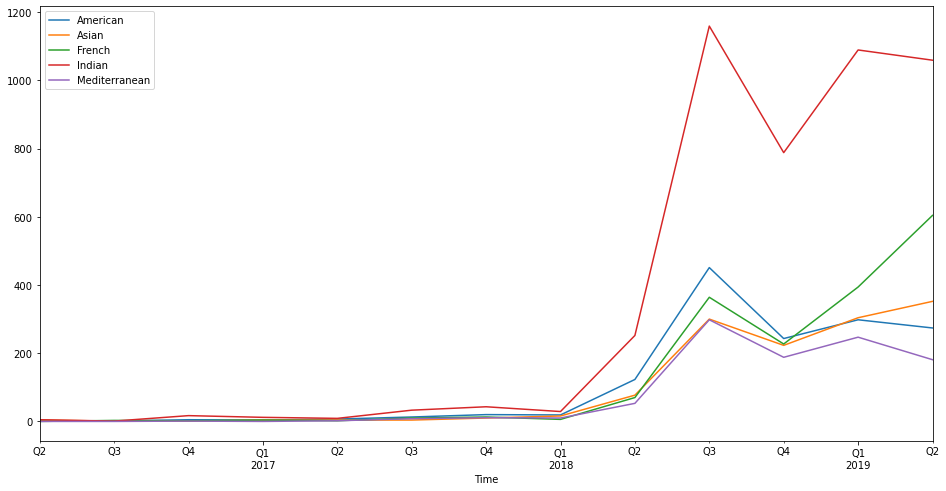

In [16]:
final.plot(figsize=(16, 8))

In [17]:
#This line graph is pretty straightforward I would say, with most reviews starting to come in around 2018.
#Indian food gets the most reviews by far, more than doubling every other cuisine.
#French reviews seem to be on the rise at the end but still aren't that close to Indian.